In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/Fish.csv')

data = df[['Length2']]
target = df['Weight']

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=50, random_state=42
)

In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [3]:
print(lr.score(train_input, train_target))

0.8601633292384396


/home/yongsoo/miniconda3/envs/ml_study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


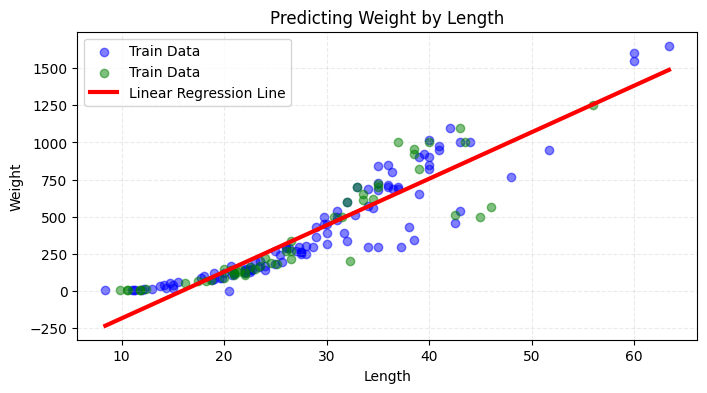

학습 세트 점수: 0.8602
테스트 세트 점수: 0.8032


In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 4))
plt.title('Predicting Weight by Length')

# 실제 데이터 점 찍기
plt.scatter(train_input, train_target, color='blue', alpha=0.5, label='Train Data')
plt.scatter(test_input, test_target, color='green', alpha=0.5, label='Train Data')

# 회귀 직선 그리기 (스케일링된 범위 내에서)
# 스케일링된 최소값에서 최대값까지의 범위를 생성
x_range = np.linspace(train_input.min(), train_input.max(), 100).reshape(-1, 1)
y_pred = lr.predict(x_range)

plt.plot(x_range, y_pred, color='red', linewidth=3, label='Linear Regression Line')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.25)
plt.show()

# 모델 성능 확인 (결정계수 R^2)
print(f"학습 세트 점수: {lr.score(train_input, train_target):.4f}")
print(f"테스트 세트 점수: {lr.score(test_input, test_target):.4f}")